In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install -U seaborn


Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("Billionaire.csv")

In [4]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
Name        2755 non-null object
NetWorth    2755 non-null object
Country     2755 non-null object
Source      2755 non-null object
Rank        2755 non-null int64
Age         2676 non-null float64
Industry    2755 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [6]:
data.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [47]:
data['Source']

0              Amazon
1       Tesla, SpaceX
2                LVMH
3           Microsoft
4            Facebook
            ...      
2750       e-commerce
2751       Fiberglass
2752      gold mining
2753     conglomerate
2754         Software
Name: Source, Length: 2676, dtype: object

In [7]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
Name        2676 non-null object
NetWorth    2676 non-null object
Country     2676 non-null object
Source      2676 non-null object
Rank        2676 non-null int64
Age         2676 non-null float64
Industry    2676 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 167.2+ KB


In [10]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [11]:
data['NetWorth'] = data['NetWorth'].str.strip("$")

In [12]:
data["NetWorth"] = data['NetWorth'].str.strip("B")

In [13]:
data["NetWorth"]  = data['NetWorth'].astype(float)

In [14]:
data['NetWorth']

0       177.0
1       151.0
2       150.0
3       124.0
4        97.0
        ...  
2750      1.0
2751      1.0
2752      1.0
2753      1.0
2754      1.0
Name: NetWorth, Length: 2676, dtype: float64

In [15]:
df = data.sort_values(by = ["NetWorth"] , ascending = False ).head(10)

In [16]:
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


In [17]:
 plt.figure(figsize = (20,10))

<Figure size 2000x1000 with 0 Axes>

In [18]:
sns.histplot(x = "Name" , hue = "NetWorth" , data = df)

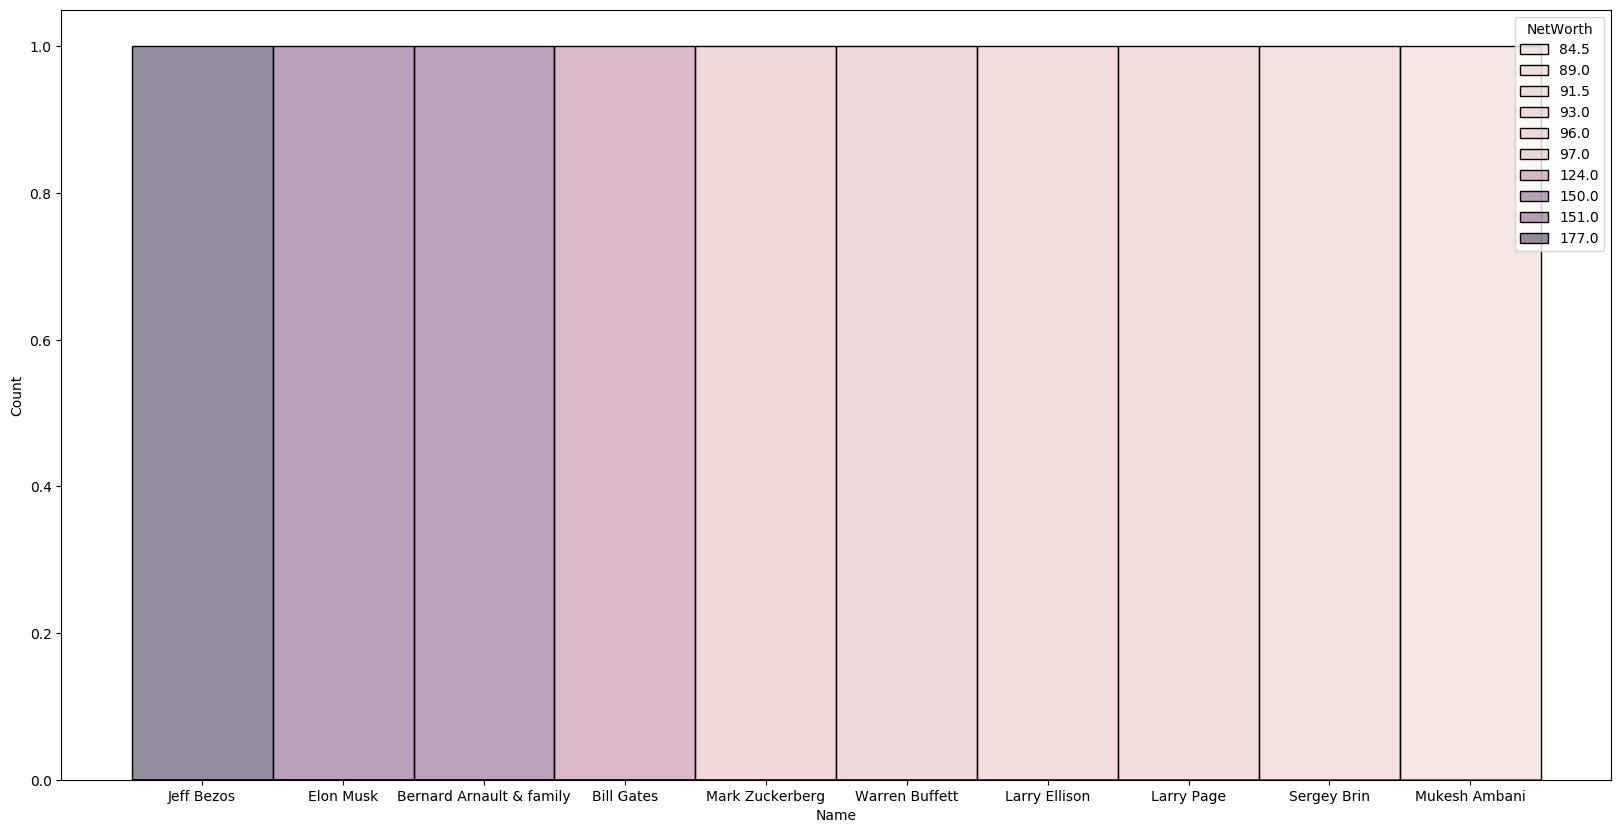

In [19]:
plt.show()

In [20]:
a = data["Source"].value_counts().head()

In [21]:
a

real estate        169
pharmaceuticals     96
investments         89
diversified         78
software            61
Name: Source, dtype: int64

In [22]:
index = a.index

In [23]:
index

Index(['real estate', 'pharmaceuticals', 'investments', 'diversified',
       'software'],
      dtype='object')

In [25]:
values = a.values

In [26]:
values

array([169,  96,  89,  78,  61])

In [27]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]

In [28]:
plt.figure(figsize = (5,5))

<Figure size 500x500 with 0 Axes>

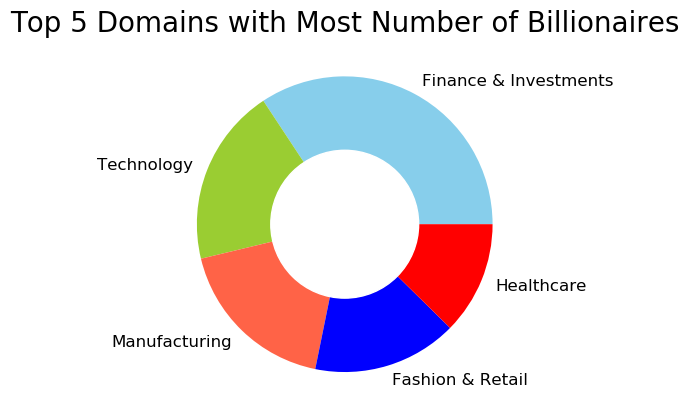

In [42]:
plt.pie(values, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains with Most Number of Billionaires", fontsize=20)
plt.show()

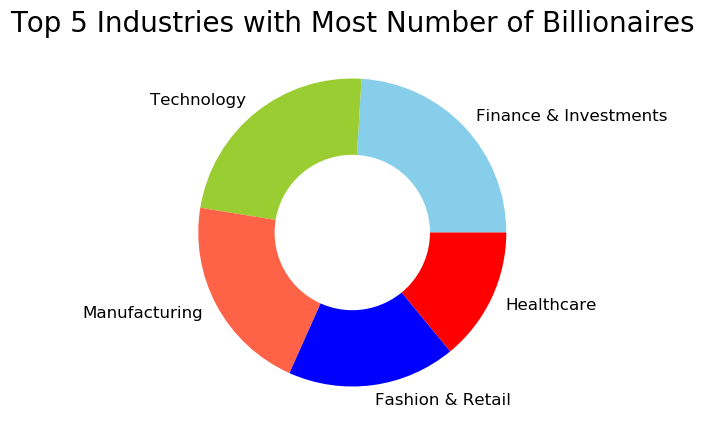

In [43]:
a = data["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(industries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=20)
plt.show()

In [44]:
a = data["Industry"].value_counts().head()
a

Finance & Investments    365
Technology               355
Manufacturing            317
Fashion & Retail         268
Healthcare               213
Name: Industry, dtype: int64

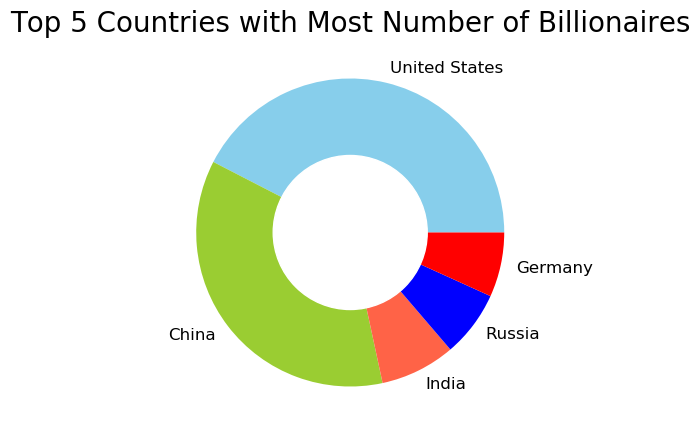

In [45]:
a = data["Country"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=20)
plt.show()